# Homework 1
This homework consists of three parts:
* Numpy (2.5 points)
* Matplotlib (4.0 points)
* Linear Regression (3.5 points)

The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

*Note from the author: This notebook should work fine after restart if you have all the packages installed. Feel free to restart the cells :)*

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Task 1 (0.25 points)

In [4]:
# task 1 (0.25 points)

"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([0, 2, 0, 3])
output: 3
"""
def max_after_zero(x: np.array) -> int:
    """
    we will create a helper array of the same size, 
    which has ones at the indices preceding zero in the original array,
    and zeros otherwise
    """
    helper = np.roll(x, 1) #shifting values by 1
    helper[0] = 1 #the first element cannot be preceeded by zero
    return np.max(x[helper == 0])

In [5]:
#test 1
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
print(max_after_zero(x))
assert max_after_zero(x) == 10
print("OK")

10
OK


In [6]:
#test 2
x = np.array([15, 1, 2, 0, 6, 0, 10, 0])
print(max_after_zero(x))
assert max_after_zero(x) == 10
print("OK")

10
OK


In [7]:
#test 3
x = np.array([0, -1, 0, -2, 0])
print(max_after_zero(x))
assert max_after_zero(x) == -1
print("OK")

-1
OK


### Task 2 (0.25 points)

In [8]:
# task 2 (0.25 points)

"""
description: given an image (height, width, numChannels) and weights (numChannels)
Sums the image channels with the specified weights and return the result as
a size matrix (height, width).

Give an example of how the function works – convert a color image to shades of
gray using np.array coefficients([0.299, 0.587, 0.114]).
Take a cool picture for the joy of the assistant and draw it
before and after the transformation.
"""

def grayscale(img: np.array, weights: np.array) -> np.array:
    return np.matmul(img, weights)

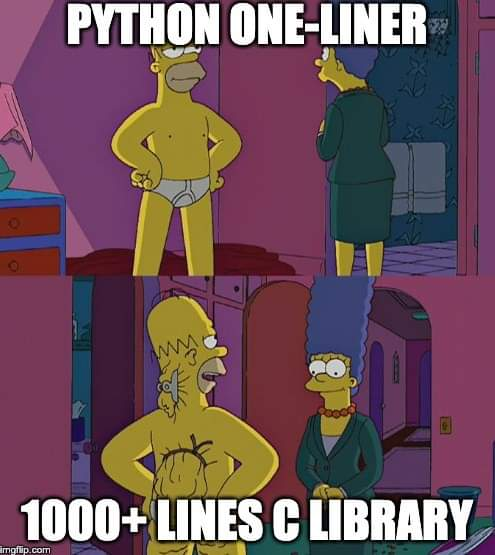

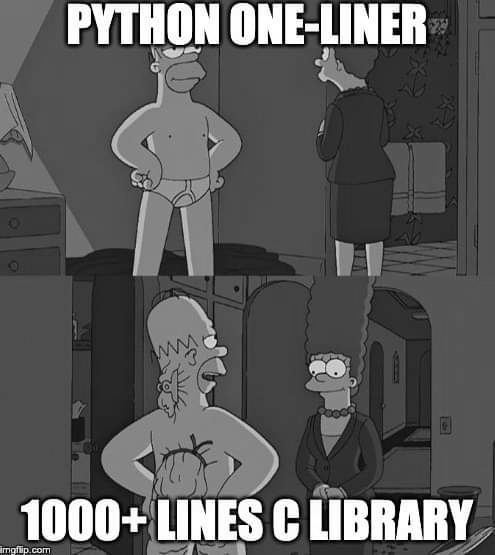

OK


In [11]:
import PIL
from PIL import Image 
import requests

img = Image.open(requests.get('https://i.redd.it/37xqk9umycn31.jpg', stream=True).raw) #importing image from Reddit
img_array = np.asarray(img)
display(img)

weights = np.array([0.299, 0.587, 0.114])

img2_array = grayscale(img_array, weights)
img2 = Image.fromarray(img2_array.astype(np.uint8), 'L')

display(img2)
print("OK")

### Task 3 (0.5 points)

In [12]:
# task 3 (0.5 points)

"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    """
    we will first stack two blocks horizontally, 
    then concatenate two instances of such half-matrices
    """
    half_matrix = np.hstack((block, block))
    return np.concatenate((half_matrix, half_matrix))

In [13]:
#test 1
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


In [14]:
#test 2
block = np.array([[1, 3, 3, 5], [7, 0, 0, 1], [-1, -1, -1, -1]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 5, 1, 3, 3, 5],
              [7, 0, 0, 1, 7, 0, 0, 1],
              [-1, -1, -1, -1, -1, -1 ,-1, -1],
              [1, 3, 3, 5, 1, 3, 3, 5],
              [7, 0, 0, 1, 7, 0, 0, 1],
              [-1, -1, -1, -1, -1, -1 ,-1, -1],
              ])
)
print("OK")

OK


### Task 4 (0.5 points)

In [15]:
# task 4 (0.5 points)

"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    return np.prod(np.diagonal(matrix)[np.diagonal(matrix) != 0])

In [16]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


### Task 5 (0.5 points)

In [17]:
# task 5 (0.5 points)

"""
description: this class implements StandardScaler from the sklearn library
As input, the fit method accepts a matrix where the signs are arranged in
columns, the fit method must remember mu and sigma for each of the signs,
and the transform must normalize the matrix with the pre-calculated mu and sigma.
"""
class StandardScaler:
    def fit(self, X: np.array):
        self.means = np.array([np.mean(X, axis=0),] * X.shape[0])
        self.stdevs = np.array([np.std(X, axis=0), ] * X.shape[0])
        #print(self.means, self.stdevs)

    def transform(self, X: np.array) -> np.array:
        return (X - self.means) / self.stdevs

In [18]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)
#print(scaler.transform(matrix))

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


### Task 6 (0.5 points)

In [19]:
# task 6 (0.5 points)

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    """
    we will create an array with coefficients corresponding to the power of x
    in the integral function, and then divide coefficients in the original array 
    by these powers. Then we will add 42 to the array.
    """
    return np.append(coefs / np.arange(coefs.shape[0], 0, -1), 42.)

In [20]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [21]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

### Task 1 (2.0 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose mu and sigma on your choice). Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): draw a circle centered in mu with a radius such that 0.99 of all points fall there, also draw a circle with a radius of 3 sigma. Draw a point mu in a separate color.

Use subplot to draw histograms with 10 buckets for each dimension and draw a density graph along the histogram.

(0.0, 1.0, 0.0, 1.0)

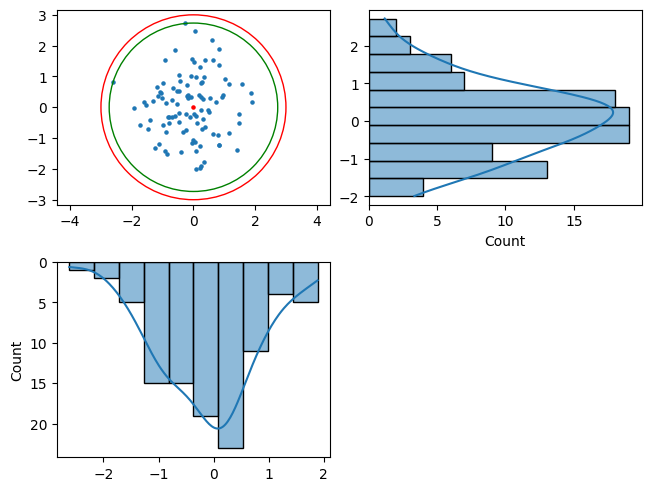

In [23]:
import math, seaborn as sns

np.random.seed(seed=42)

mu = 0
sigma = 1
size = 100
gauss = np.random.multivariate_normal(mu+np.zeros(2), sigma**2*np.identity(2), size=size)
fig, axs = plt.subplots(2, 2, constrained_layout=True)

#scatter plot and circles
x_coords, y_coords = gauss.T
axs[0, 0].scatter(x_coords, y_coords, s=5)
axs[0, 0].scatter([mu], [mu], color='red', s=5)

norms = np.sort(np.sqrt((x_coords**2 + y_coords**2)))
R = norms[math.floor(0.99*size-1)]
circle1 = plt.Circle((mu, mu), R, fill=False, color='green')
circle2 = plt.Circle((mu, mu), 3*sigma, fill=False, color='red')
axs[0, 0].add_patch(circle1)
axs[0, 0].add_patch(circle2)

axs[0, 0].axis('equal')

#histograms
x_coords, y_coords = gauss.T
sns.histplot(x=x_coords, ax=axs[1, 0], bins = 10, kde=True)
axs[1, 0].invert_yaxis()
sns.histplot(y=y_coords, ax=axs[0, 1], bins = 10, kde=True)
axs[1, 1].axis('off')

### Task 2 (2.0 points)

Upload the dataset from the last seminar [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Build a **heatmap** with correlations between features, rows and columns should be signed with feature names. It is important to use matplotlib. The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use plt.xticks, plt.yticks, plt.imshow, plt.colorbar

Also build the same heatmap using seaborn.heatmap

<Axes: >

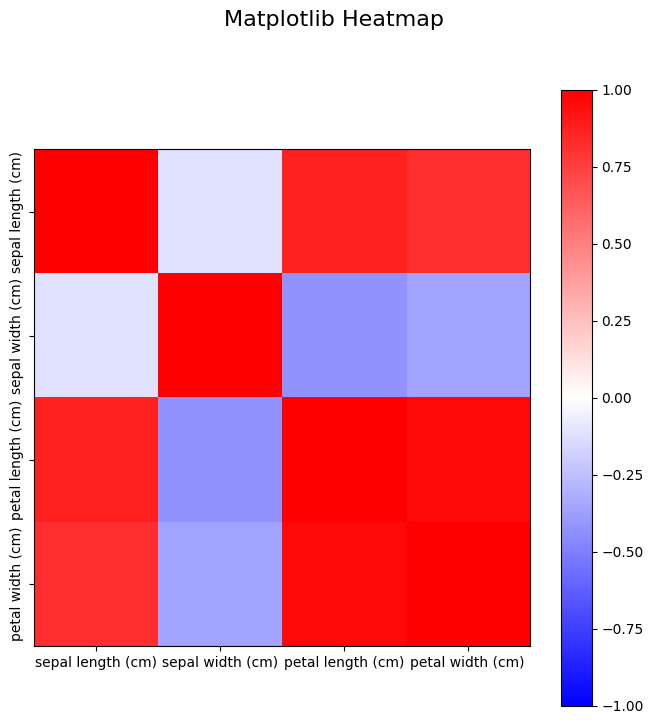

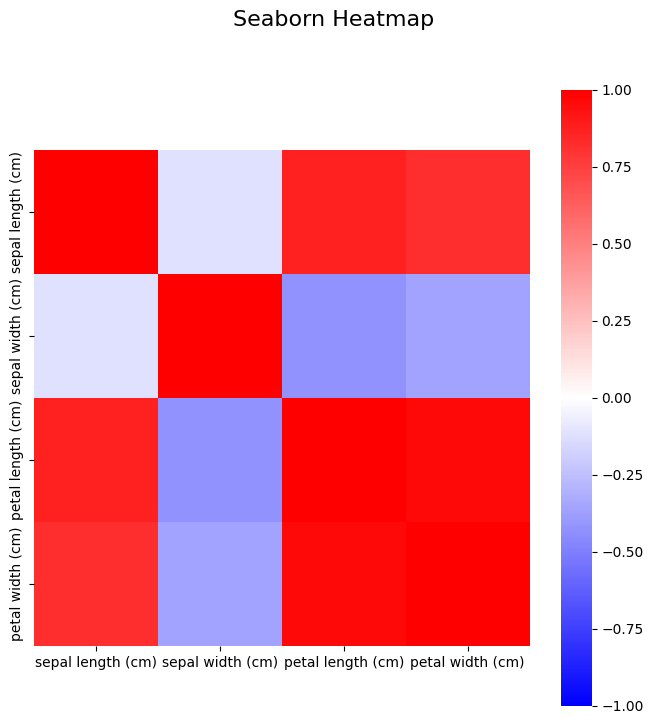

In [24]:
import matplotlib
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris(as_frame=True)
df = iris.data
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Matplotlib Heatmap', fontsize=16)
im = ax.imshow(corr_matrix, cmap='bwr', vmin=-1, vmax=1)
cbar = ax.figure.colorbar(im, ax=ax)
xtick = ax.set_xticks(ticks=list(range(len(corr_matrix))), 
                      labels=list(corr_matrix.columns))
ytick = ax.set_yticks(ticks=list(range(len(corr_matrix))), 
                      labels=list(corr_matrix.columns),
                      rotation='vertical', va='center')


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Seaborn Heatmap', fontsize=16)
sns.heatmap(corr_matrix, 
            cmap='bwr', 
            square=True, 
            vmin=-1, 
            vmax=1)

## Part 3. Linear Regression
In this part, you need to implement a class with an analytical solution of linear regression and use all the skills you have acquired.

You are allowed to use any libraries: sklearn, numpy, matplotlib, scipy, etc.

Conclusions are needed for each step, only the code will be rated at 0 points

Load a dataset using np.loadtxt and split it into train and test

In [75]:
data = np.loadtxt('https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=1', skiprows = 1, delimiter=',')
data

array([[-0.57081  ,  1.       ,  0.17866  ,  0.11737  , -0.31206  ,
        -0.42739  ],
       [-0.55659  ,  1.       ,  0.073893 , -0.0097053,  0.23849  ,
        -0.71238  ],
       [-0.54237  ,  1.       , -0.19324  ,  0.35819  , -0.02984  ,
        -0.50518  ],
       ...,
       [ 2.5074   ,  1.       ,  0.35703  ,  0.10138  ,  0.23348  ,
        -0.21654  ],
       [ 2.5641   ,  1.       , -0.26588  ,  0.2802   ,  0.20216  ,
         0.30126  ],
       [ 2.6121   ,  1.       , -0.036334 ,  0.20641  ,  0.38072  ,
        -0.034651 ]])

In [78]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
X = data[:, [1, 2, 3, 4, 5]]
y = data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### Task 1 (0.5 points)

Plot the dependence of the target on the features and distributions of features, correlations and and everything that you think is important **(0.5 points)**

_Solution:_ First, let us plot the dependence of $y$ on the features $x_i$, $i \in (1, 4)$

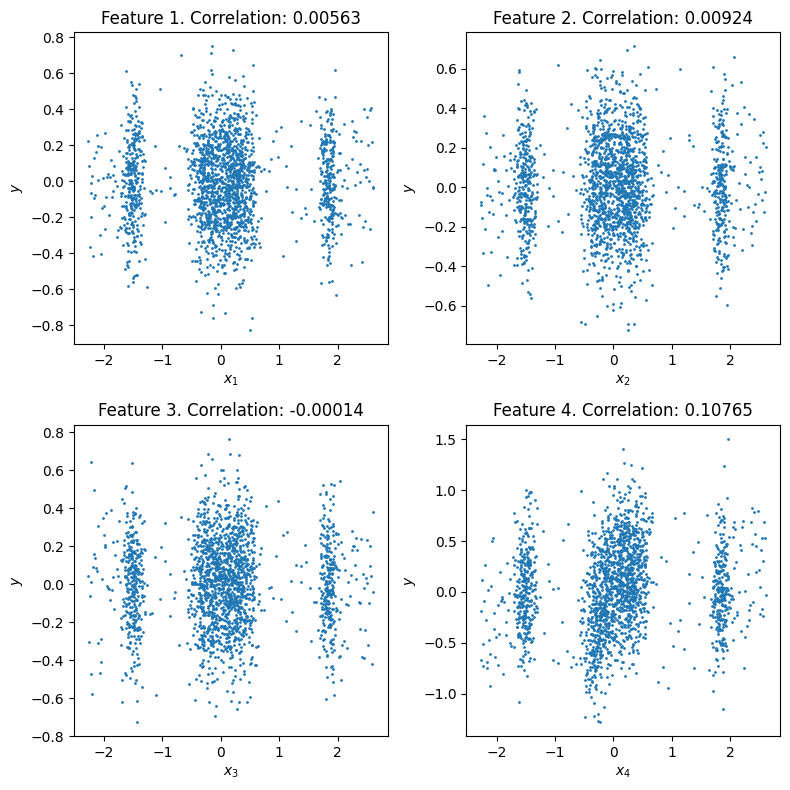

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in (0, 1):
    for j in (0, 1):
        axs[i, j].scatter(y, X[:, 2*i+j+1], s=1)
        axs[i, j].set_title(f'Feature {2*i+j+1}. Correlation: {round(np.corrcoef(y, X[:, 2*i+j+1])[1][0], 5)}')
        axs[i, j].set_xlabel(f'$x_{2*i+j+1}$')
        axs[i, j].set_ylabel('$y$')
plt.tight_layout()

We can clearly observe three major clusters in every graph, however, the overall dependence of $y$ on either feature is abscent. Perhaps, this can mean that the features are initially not good for predicting the target value.

Now let us plot the distrubution of $y$

<Axes: ylabel='Count'>

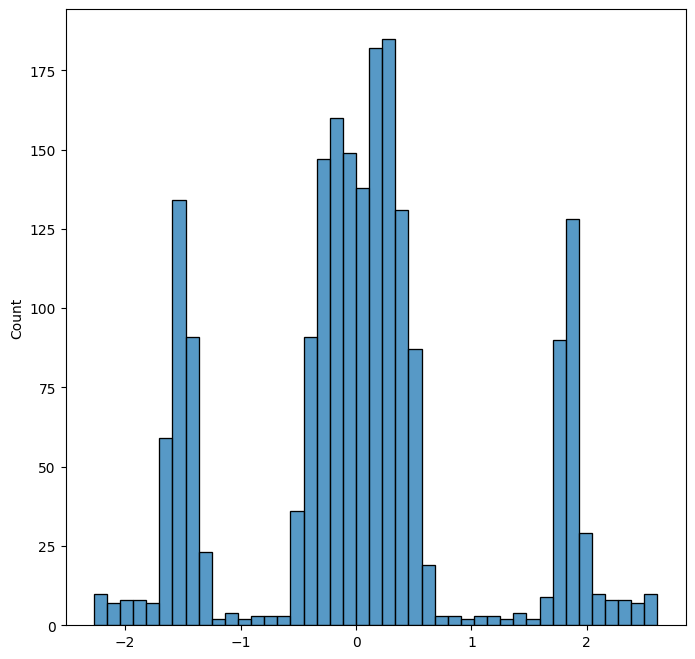

In [80]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(ax=ax, data=y)

We can once again see that the target value has three major clusters.

Now let us analyse the features by plotting the correlation matrix

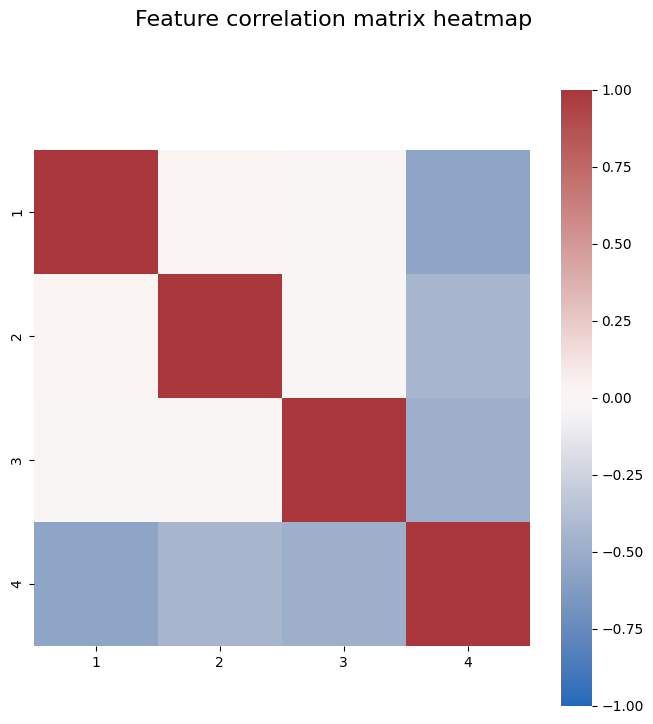

In [81]:
df_features = pd.DataFrame(X)
corr_matrix = df_features.iloc[:, 1:].corr()

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Feature correlation matrix heatmap', fontsize=16)
heatmap = sns.heatmap(corr_matrix, 
            cmap='vlag', 
            square=True, 
            vmin=-1, 
            vmax=1)

We see that features do not strongly correlate with each other, only the fourth feature has $\approx -0.5$ correlation with other ones.

Let us further analyze the features by plotting their distributions

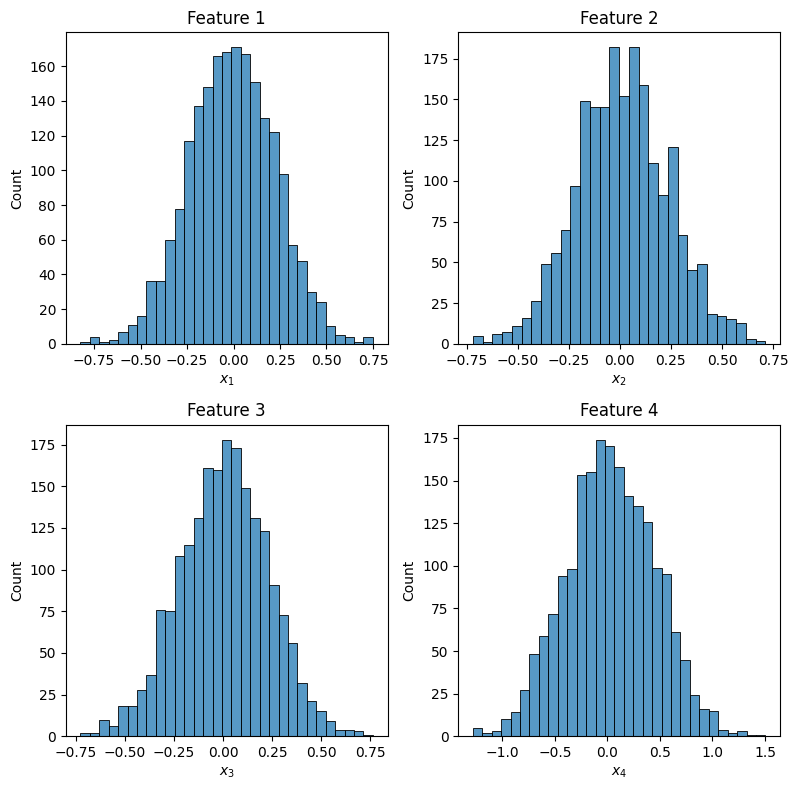

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in (0, 1):
    for j in (0, 1):
        sns.histplot(ax=axs[i, j], data=X[:, 2*i+j+1])
        axs[i, j].set_title(f'Feature {2*i+j+1}')
        axs[i, j].set_xlabel(f'$x_{2*i+j+1}$')
plt.tight_layout()

_Conclusion:_ We did not observe any major issues with features that can potentially disturb our analysis (in partucilar, multicollinearity or unbalanced distribution). However, we do not see any clear correlation between the target and the features. This can mean that we would not be able to predict the target well with given features.

### Task 2 (0.5 points)

Implement a linear regression class, normalize features if needed and fit model **(0.5 points)**

In [83]:
from sklearn.preprocessing import normalize

class MyLinearRegression:
    def fit(self, X_train, y_train):
        X = X_train
        X = normalize(X)
        y = y_train
        self.weights = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T).dot(y)

    def predict(self, X_test):
        return X_test.dot(self.weights)
    
    def get_weights(self):
        return self.weights

In [84]:
linreg = MyLinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
MSE = np.sum((y_pred-y_test)**2) / len(y_test)
print(MSE)
R2 = sklearn.metrics.r2_score(y_test, y_pred)
print(R2)

0.9660037030452406
0.04285243204550959


We see that the MSE metric is around 1, which means that the average deviation from the correct prediction is 1. Since the values of $y$ also have a range around 1, this means that our model is quite bad at predicting the target. This is confirmed by the $R^2$ score, which is close to 0, meaning that our model accounts only for 0.04 of the dependence.

### Task 3 (1.0 points)

Try to come up with a way to understand which feature contributes more to your model **(1.0 points)**

First, let us check which features have more weights in our model. The features with the weight close to 0 contribute less to the resulting prediction.

In [85]:
linreg.get_weights()

array([0.01774534, 1.27141008, 0.94236415, 1.0840684 , 1.22797538])

We see that the bias is close to 0, and all the features are around 1, so we cannot say that some features are unimportant.

From the four scatter plots above we remember that the correlation coefficient is close to 0 for all features but 0.1 for the fourth one. This might mean that the fourth feature has some effect on the variable, while the other ones are a noise. Let us create the same model with only the fourth feature.

In [97]:
linreg = MyLinearRegression()
linreg.fit(X_train[:, 4].reshape(-1, 1), y_train)
y_pred = linreg.predict(X_test[:, 4].reshape(-1, 1))
MSE = np.sum((y_pred-y_test)**2) / len(y_test)
print(MSE)
R2 = sklearn.metrics.r2_score(y_test, y_pred)
print(R2)
print(linreg.get_weights())

1.0058297901729314
0.003391462780852783
[0.09445024]


We see that the accuracy of the model has not changed.

### Task 4 (0.5 points)

Plot the dependence on the size of the training sample and the mse score **(0.5 points)**

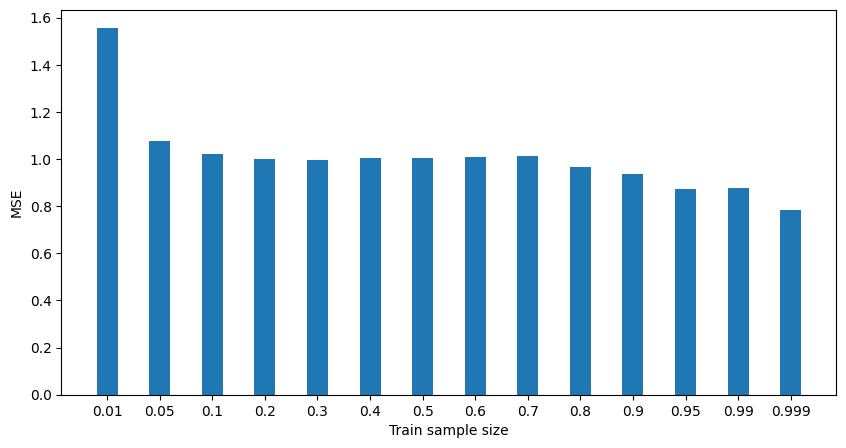

In [34]:
X = data[:, [1, 2, 3, 4, 5]]
y = data[:, 0]
numsteps = 10
linreg = MyLinearRegression()
train_size_hist = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]
MSE_hist = []

for train_size in train_size_hist:
    test_size = 1 - train_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=15)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    MSE = np.sum((y_pred-y_test)**2) / len(y_test)
    
    MSE_hist.append(MSE)

fig, ax = plt.subplots(figsize=(10, 5))
train_size_hist = list(map(str, train_size_hist))
ax.bar(train_size_hist, MSE_hist, align='center', width=0.4)
ax.set_xlabel('Train sample size')
ax.set_ylabel('MSE')
ticks = ax.set_xticks(train_size_hist)

It may seem that MSE is decreasing with the increase of the size of the test sample, however, if we change the `random_state` parameter in `train_test_split`, we can get various results.
Only thing in common is that the MSE is always greater than 0.8, which is still quite bad having the values of $y$ be around 1.

### Task 5 (0.5 points)

Fit LinearRegression model from sklearn. Try to get the minimum MSE score as possible. Compare results with your model **(0.5 points)**

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
minMSE = -1
R2 = -1
linreg = LinearRegression()
train_size_hist = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]
for train_size in train_size_hist:
    test_size = 1 - train_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    MSE = np.sum((y_pred-y_test)**2) / len(y_test)
    if MSE < minMSE or minMSE == -1:
        minMSE = MSE
        R2 = sklearn.metrics.r2_score(y_test, y_pred)

print(MSE)
print(R2)

2.4935481725467175
0.07206201221996988


Again, changing `random_state` allows us to get various results (sometimes even good ones), however, most of the time the result is quite bad (MSE around 1, $R^2$ close to 0 or negative). Overall, the result is the same as with our model. This means that our model is OK, but the initial data is quite bad and random, so we cannot adequately predict the target. Perhaps, this dataset would be good for classification, but not regresion.

### Task 6 (0.5 points)

Describe the challenges you had to face :) **(0.5 points)**

Initially, I thought my model was not working correctly, as I was getting the negative $R^2$ index. However, I have learned that the $R^2$ can be negative despite the name, and it means that my model does not indeed predict well. I then tried to fix this by checking that I imported the data correctly and playing with normalization. But after plugging the dataset into `LinearRegression` from `sklearn`, I saw that the result was the same, so I concluded that the data was initially bad for regression.